# DAT200 CA3 2022

Kaggle username: Mohamed Atteyeh

### Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Reading data

In [7]:
training_data = pd.read_csv('train.csv', index_col= 0 ) # Training Data
test_data = pd.read_csv('test.csv',index_col = 0) # Test Data

### Data exploration and visualisation

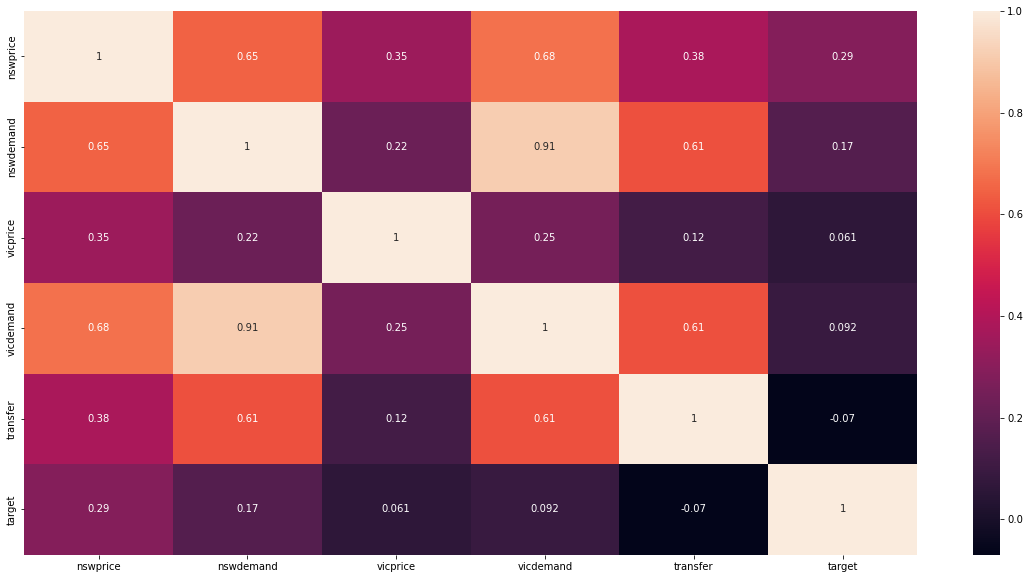

In [8]:
# Insert your code below
# ====================== # loading the data
nan_values = training_data.isna().sum() # Checking for nan values , this gave a zero 
corr_data=training_data[training_data.columns].corr() # finding the correlation values

# Here is where we plot
plt.figure(figsize=(20,10))
sns.heatmap(corr_data, annot=True)
plt.show()

### Data cleaning

In [9]:
# The outliers that needs to be removed 
outliers = training_data.loc[training_data['transfer'] < 0] 
training_data = training_data.drop(training_data.index[list(outliers.index)])

print(outliers)

       nswprice  nswdemand  vicprice  vicdemand   transfer  target
index                                                             
1883  -2.029056  -9.901824 -0.110944 -13.533280 -13.277184       1
2501  -1.212448 -10.106528 -0.082752 -11.591936 -13.866656       1
5615  -1.322912 -20.103552 -0.087552 -14.798560 -18.343872       1
6044  -3.354880 -17.651904 -0.229600 -17.822880  -8.505248       0
9310  -2.797632 -16.718848 -0.186112 -17.549472 -13.614048       1
11593 -1.517952 -15.876224 -0.110944 -13.533280 -13.277184       1
16156 -1.804256 -19.870272 -0.125504 -17.996896  -6.161408       0
18200 -1.935872 -10.187456 -0.110944 -13.533280 -13.277184       1
24771 -1.203808 -17.723296 -0.080288 -16.555168 -19.382464       0
33381 -1.486240 -13.529312 -0.110944 -13.533280 -13.277184       0


### Data exploration after cleaning

In [12]:
# The outliers after cleaning 

cleaned_outliers = training_data.loc[training_data['transfer'] < 0]

print(cleaned_outliers)

Empty DataFrame
Columns: [nswprice, nswdemand, vicprice, vicdemand, transfer, target]
Index: []


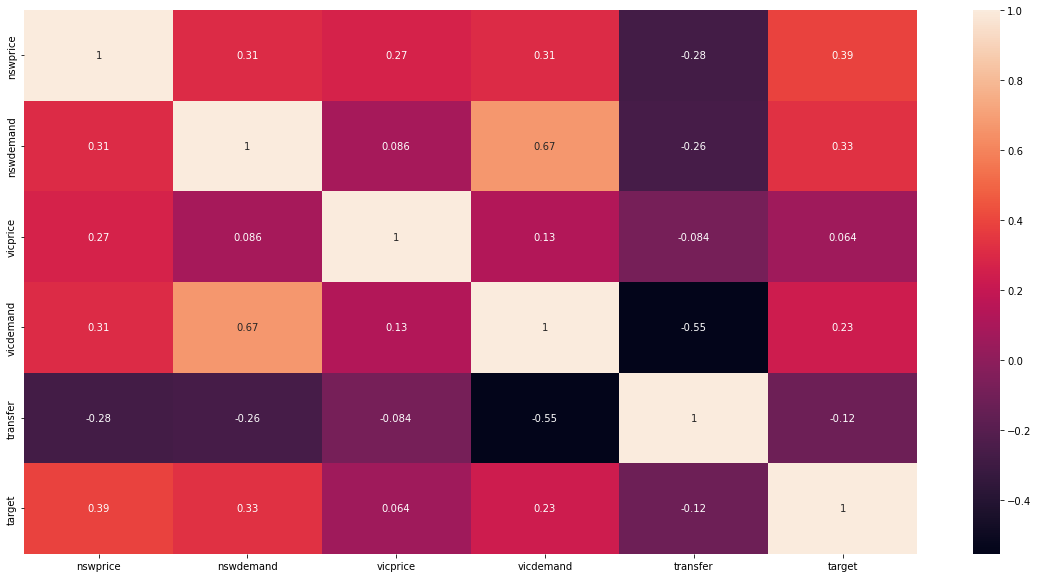

In [10]:
# Insert your code below
# ====================== # loading the data
nan_values = training_data.isna().sum() # Checking for nan values , this gave a zero 
corr_data=training_data[training_data.columns].corr() # finding the correlation values

# Here is where we plot
plt.figure(figsize=(20,10))
sns.heatmap(corr_data, annot=True)
plt.show()

### Data preprocessing

In [13]:
# Processsing the data, and splitting the X intercept and y intercept
X = training_data.iloc[:,:-1].copy()
y = training_data.iloc[:,-1].copy()

### Modelling

In [19]:
all_acc_test = []
all_acc_train = []
n_values = []

# Testing with multiple train and test splits, and finding the best value

for n in range(100,200):
    train_acc = []
    test_acc = []
    n_values.append(n)
    for r in range(1,10):
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=r, stratify= y)

        forest = RandomForestClassifier(criterion='gini',
                                        n_estimators=n, 
                                        random_state= 1,
                                        n_jobs=-1)
        forest.fit(X_train, y_train)
        train_acc.append(forest.score(X_train, y_train))
        test_acc.append(forest.score(X_test, y_test))
    
    all_acc_test.append(np.mean(test_acc))
    all_acc_train.append(np.mean(train_acc))


### Evaluation

In [20]:
#Evaluating the model, and checking the accuaracy
jmax = max(all_acc_test)
n_value = (str(i) for i,j in zip(n_values,all_acc_test) if j == jmax)
train_accuarcy = (str(k) for k,j in zip(all_acc_train,all_acc_test) if j == jmax)
print(','.join(n_value), ','.join(train_accuarcy), jmax) # Here i looked at the best value for the estimaters 

163 0.9995983035330605 0.8007279543175974


### Kaggle submission

In [21]:
# The submission model, with chosen parameters from the Evaluation.

forest_xtrain = X
forest_ytrain = y
forest_test = test_data
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=163,
                                random_state= 1,
                                n_jobs=-1)
forest.fit(forest_xtrain, forest_ytrain)

# The pridiction and the submission file to Kaggle
forest_target_predictions = forest.predict(forest_test)
output = pd.DataFrame({'index': forest_test.index,'target': forest_target_predictions})
output.to_csv('submission_forest',index=False)
